In [ ]:
import os
import time
import pyvisa
import numpy as np
import requests
import matplotlib.pyplot as plt
from pathlib import Path

print("All dependency libraries imported successfully!")

All dependency libraries imported successfully!


In [2]:
# Get current file directory and construct absolute paths
current_dir = Path.cwd()
tools_dir = current_dir / "../tools"

bvc_tools_path = tools_dir / "BVC_Tools.ipynb"

%run $bvc_tools_path
bvcTools = BVCTools()

print("Tool classes imported successfully!")

All dependency libraries imported successfully!
Jupyter signal generator class definition completed!
Tool classes imported successfully!


In [7]:
# Configure device parameters
device_ip = "127.0.0.1"

# Sample rate
sample_rate: int = 4 # 4GHz sample rate

wave = """

"""

wave_type = "Int16" # """Int16/Float/Double/IQ(Int16)/IQ(Float32)/IQ(Double)"""

In [8]:
wave = """
13312
14784
14784
2048
2048
14912
14912
10304
10304
1536
1536
4544
4544
8960
8960
15680
15680
15808
15808
2560
2560
15872
15872
15680
15680
7936
7936
13056
13056
2304
2304
6848
6848
14976
14976
12928
12928
15680
15680
10688
10688
576
576
13888
13888
15296
15296
11072
11072
12352
12352
12160
12160
6400
6400
10688
10688
2752
2752
11520
11520
512
512
4480
4480
704
704
1536
1536
13440
13440
11328
11328
5184
5184
15552
15552
512
512
7168
7168
6208
6208
12480
12480
12992
12992
3008
3008
8000
8000
7296
7296
10560
10560
11584
11584
12352
12352
4480
4480
11136
11136
10688
10688
2624
2624
1920
1920
8128
8128
15680
15680
5568
5568
9536
9536
3648
3648
12288
12288
4160
4160
8256
8256
11392
11392
14592
14592
15680
15680
8960
8960
2240
2240
2432
2432
4160
4160
13760
13760
4160
4160
13312
13312
3968
3968
15168
15168
5696
5696
3200
3200
4096
4096
10048
10048
7744
7744
5760
5760
13568
13568
9536
9536
8960
8960
14976
14976
4672
4672
12352
12352
12288
12288
6208
6208
9280
9280
1216
1216
832
832
8640
8640
12736
12736
15296
15296
2112
2112
9280
9280
7680
7680
192
192
5504
5504
2624
2624
12992
12992
5056
5056
8640
8640
2688
2688
9856
9856
4288
4288
10688
10688
11264
11264
12224
12224
7360
7360
1344
1344
3712
3712
14912
14912
2496
2496
13504
13504
8768
8768
16320
16320
1280
1280
7232
7232
1728
1728
15744
15744
64
64
12672
12672
13376
13376
14208
14208
1344
1344
6528
6528
4224
4224
13056
13056
7040
7040
14912
14912
2944
2944
4288
4288
2368
2368
2176
2176
14208
14208
9472
9472
8960
8960
2368
2368
13952
13952
10176
10176
5696
5696
8384
8384
6528
6528
1216
1216
3904
3904
1984
1984
3008
3008
3904
3904
6784
6784
768
768
14784
14784
15424
15424
8000
8000
8000
8000
5504
5504
14720
14720
6016
6016
1792
1792
12736
12736
6336
6336
3904
3904
6592
6592
1536
1536
2112
2112
15424
15424
15616
15616
9408
9408
960
960
3840
3840
5760
5760
13440
13440
192
192
704
704
2752
2752
10624
10624
11968
11968
10560
10560
7360
7360
8960
8960
4800
4800
12160
12160
3072
3072
11200
11200
2944
2944
6016
6016
10240
10240
12736
12736
1280
1280
15168
15168
12672
12672
7936
7936
7104
7104
7296
7296
4992
4992
8320
8320
8320
8320
13376
13376
12992
12992
10496
10496
6144
6144
13248
13248
8704
8704
5696
5696
15360
15360
14336
14336
8960
8960
10176
10176
9600
9600
3392
3392
4928
4928
7680
7680
3776
3776
13824
13824
3136
3136
3648
3648
2752
2752
3712
3712
7104
7104
5056
5056
15104
15104
7040
7040
3008
3008
14784
14784
16000
16000
7168
7168
1792
1792
4224
4224
6656
6656
9728
9728
4288
4288
9856
9856
11648
11648
3584
3584
1920
1920
4800
4800
5184
5184
6912
6912
8320
8320
1344
1344
4288
4288
13120
13120
448
448
15168
15168
11904
11904
8000
8000
9472
9472
3840
3840
7488
7488
7488
13312
14784
14784
2048
2048
14912
14912
10304
10304
1536
1536
4544
4544
8960
8960
15680
15680
15808
15808
2560
2560
15872
15872
15680
15680
7936
7936
13056
13056
2304
2304
6848
6848
14976
14976
12928
12928
15680
15680
10688
10688
576
576
13888
13888
15296
15296
11072
11072
12352
12352
12160
12160
6400
6400
10688
10688
2752
2752
11520
11520
512
512
4480
4480
704
704
1536
1536
13440
13440
11328
11328
5184
5184
15552
15552
512
512
7168
7168
6208
6208
12480
12480
12992
12992
3008
3008
8000
8000
7296
7296
10560
10560
11584
11584
12352
12352
4480
4480
11136
11136
10688
10688
2624
2624
1920
1920
8128
8128
15680
15680
5568
5568
9536
9536
3648
3648
12288
12288
4160
4160
8256
8256
11392
11392
14592
14592
15680
15680
8960
8960
2240
2240
2432
2432
4160
4160
13760
13760
4160
4160
13312
13312
3968
3968
15168
15168
5696
5696
3200
3200
4096
4096
10048
10048
7744
7744
5760
5760
13568
13568
9536
9536
8960
8960
14976
14976
4672
4672
12352
12352
12288
12288
6208
6208
9280
9280
1216
1216
832
832
8640
8640
12736
12736
15296
15296
2112
2112
9280
9280
7680
7680
192
192
5504
5504
2624
2624
12992
12992
5056
5056
8640
8640
2688
2688
9856
9856
4288
4288
10688
10688
11264
11264
12224
12224
7360
7360
1344
1344
3712
3712
14912
14912
2496
2496
13504
13504
8768
8768
16320
16320
1280
1280
7232
7232
1728
1728
15744
15744
64
64
12672
12672
13376
13376
14208
14208
1344
1344
6528
6528
4224
4224
13056
13056
7040
7040
14912
14912
2944
2944
4288
4288
2368
2368
2176
2176
14208
14208
9472
9472
8960
8960
2368
2368
13952
13952
10176
10176
5696
5696
8384
8384
6528
6528
1216
1216
3904
3904
1984
1984
3008
3008
3904
3904
6784
6784
768
768
14784
14784
15424
15424
8000
8000
8000
8000
5504
5504
14720
14720
6016
6016
1792
1792
12736
12736
6336
6336
3904
3904
6592
6592
1536
1536
2112
2112
15424
15424
15616
15616
9408
9408
960
960
3840
3840
5760
5760
13440
13440
192
192
704
704
2752
2752
10624
10624
11968
11968
10560
10560
7360
7360
8960
8960
4800
4800
12160
12160
3072
3072
11200
11200
2944
2944
6016
6016
10240
10240
12736
12736
1280
1280
15168
15168
12672
12672
7936
7936
7104
7104
7296
7296
4992
4992
8320
8320
8320
8320
13376
13376
12992
12992
10496
10496
6144
6144
13248
13248
8704
8704
5696
5696
15360
15360
14336
14336
8960
8960
10176
10176
9600
9600
3392
3392
4928
4928
7680
7680
3776
3776
13824
13824
3136
3136
3648
3648
2752
2752
3712
3712
7104
7104
5056
5056
15104
15104
7040
7040
3008
3008
14784
14784
16000
16000
7168
7168
1792
1792
4224
4224
6656
6656
9728
9728
4288
4288
9856
9856
11648
11648
3584
3584
1920
1920
4800
4800
5184
5184
6912
6912
8320
8320
1344
1344
4288
4288
13120
13120
448
448
15168
15168
11904
11904
8000
8000
9472
9472
3840
3840
7488
7488
7488
13312
14784
14784
2048
2048
14912
14912
10304
10304
1536
1536
4544
4544
8960
8960
15680
15680
15808
15808
2560
2560
15872
15872
15680
15680
7936
7936
13056
13056
2304
2304
6848
6848
14976
14976
12928
12928
15680
15680
10688
10688
576
576
13888
13888
15296
15296
11072
11072
12352
12352
12160
12160
6400
6400
10688
10688
2752
2752
11520
11520
512
512
4480
4480
704
704
1536
1536
13440
13440
11328
11328
5184
5184
15552
15552
512
512
7168
7168
6208
6208
12480
12480
12992
12992
3008
3008
8000
8000
7296
7296
10560
10560
11584
11584
12352
12352
4480
4480
11136
11136
10688
10688
2624
2624
1920
1920
8128
8128
15680
15680
5568
5568
9536
9536
3648
3648
12288
12288
4160
4160
8256
8256
11392
11392
14592
14592
15680
15680
8960
8960
2240
2240
2432
2432
4160
4160
13760
13760
4160
4160
13312
13312
3968
3968
15168
15168
5696
5696
3200
3200
4096
4096
10048
10048
7744
7744
5760
5760
13568
13568
9536
9536
8960
8960
14976
14976
4672
4672
12352
12352
12288
12288
6208
6208
9280
9280
1216
1216
832
832
8640
8640
12736
12736
15296
15296
2112
2112
9280
9280
7680
7680
192
192
5504
5504
2624
2624
12992
12992
5056
5056
8640
8640
2688
2688
9856
9856
4288
4288
10688
10688
11264
11264
12224
12224
7360
7360
1344
1344
3712
3712
14912
14912
2496
2496
13504
13504
8768
8768
16320
16320
1280
1280
7232
7232
1728
1728
15744
15744
64
64
12672
12672
13376
13376
14208
14208
1344
1344
6528
6528
4224
4224
13056
13056
7040
7040
14912
14912
2944
2944
4288
4288
2368
2368
2176
2176
14208
14208
9472
9472
8960
8960
2368
2368
13952
13952
10176
10176
5696
5696
8384
8384
6528
6528
1216
1216
3904
3904
1984
1984
3008
3008
3904
3904
6784
6784
768
768
14784
14784
15424
15424
8000
8000
8000
8000
5504
5504
14720
14720
6016
6016
1792
1792
12736
12736
6336
6336
3904
3904
6592
6592
1536
1536
2112
2112
15424
15424
15616
15616
9408
9408
960
960
3840
3840
5760
5760
13440
13440
192
192
704
704
2752
2752
10624
10624
11968
11968
10560
10560
7360
7360
8960
8960
4800
4800
12160
12160
3072
3072
11200
11200
2944
2944
6016
6016
10240
10240
12736
12736
1280
1280
15168
15168
12672
12672
7936
7936
7104
7104
7296
7296
4992
4992
8320
8320
8320
8320
13376
13376
12992
12992
10496
10496
6144
6144
13248
13248
8704
8704
5696
5696
15360
15360
14336
14336
8960
8960
10176
10176
9600
9600
3392
3392
4928
4928
7680
7680
3776
3776
13824
13824
3136
3136
3648
3648
2752
2752
3712
3712
7104
7104
5056
5056
15104
15104
7040
7040
3008
3008
14784
14784
16000
16000
7168
7168
1792
1792
4224
4224
6656
6656
9728
9728
4288
4288
9856
9856
11648
11648
3584
3584
1920
1920
4800
4800
5184
5184
6912
6912
8320
8320
1344
1344
4288
4288
13120
13120
448
448
15168
15168
11904
11904
8000
8000
9472
9472
3840
3840
7488
7488
7488
13312
14784
14784
2048
2048
14912
14912
10304
10304
1536
1536
4544
4544
8960
8960
15680
15680
15808
15808
2560
2560
15872
15872
15680
15680
7936
7936
13056
13056
2304
2304
6848
6848
14976
14976
12928
12928
15680
15680
10688
10688
576
576
13888
13888
15296
15296
11072
11072
12352
12352
12160
12160
6400
6400
10688
10688
2752
2752
11520
11520
512
512
4480
4480
704
704
1536
1536
13440
13440
11328
11328
5184
5184
15552
15552
512
512
7168
7168
6208
6208
12480
12480
12992
12992
3008
3008
8000
8000
7296
7296
10560
10560
11584
11584
12352
12352
4480
4480
11136
11136
10688
10688
2624
2624
1920
1920
8128
8128
15680
15680
5568
5568
9536
9536
3648
3648
12288
12288
4160
4160
8256
8256
11392
11392
14592
14592
15680
15680
8960
8960
2240
2240
2432
2432
4160
4160
13760
13760
4160
4160
13312
13312
3968
3968
15168
15168
5696
5696
3200
3200
4096
4096
10048
10048
7744
7744
5760
5760
13568
13568
9536
9536
8960
8960
14976
14976
4672
4672
12352
12352
12288
12288
6208
6208
9280
9280
1216
1216
832
832
8640
8640
12736
12736
15296
15296
2112
2112
9280
9280
7680
7680
192
192
5504
5504
2624
2624
12992
12992
5056
5056
8640
8640
2688
2688
9856
9856
4288
4288
10688
10688
11264
11264
12224
12224
7360
7360
1344
1344
3712
3712
14912
14912
2496
2496
13504
13504
8768
8768
16320
16320
1280
1280
7232
7232
1728
1728
15744
15744
64
64
12672
12672
13376
13376
14208
14208
1344
1344
6528
6528
4224
4224
13056
13056
7040
7040
14912
14912
2944
2944
4288
4288
2368
2368
2176
2176
14208
14208
9472
9472
8960
8960
2368
2368
13952
13952
10176
10176
5696
5696
8384
8384
6528
6528
1216
1216
3904
3904
1984
1984
3008
3008
3904
3904
6784
6784
768
768
14784
14784
15424
15424
8000
8000
8000
8000
5504
5504
14720
14720
6016
6016
1792
1792
12736
12736
6336
6336
3904
3904
6592
6592
1536
1536
2112
2112
15424
15424
15616
15616
9408
9408
960
960
3840
3840
5760
5760
13440
13440
192
192
704
704
2752
2752
10624
10624
11968
11968
10560
10560
7360
7360
8960
8960
4800
4800
12160
12160
3072
3072
11200
11200
2944
2944
6016
6016
10240
10240
12736
12736
1280
1280
15168
15168
12672
12672
7936
7936
7104
7104
7296
7296
4992
4992
8320
8320
8320
8320
13376
13376
12992
12992
10496
10496
6144
6144
13248
13248
8704
8704
5696
5696
15360
15360
14336
14336
8960
8960
10176
10176
9600
9600
3392
3392
4928
4928
7680
7680
3776
3776
13824
13824
3136
3136
3648
3648
2752
2752
3712
3712
7104
7104
5056
5056
15104
15104
7040
7040
3008
3008
14784
14784
16000
16000
7168
7168
1792
1792
4224
4224
6656
6656
9728
9728
4288
4288
9856
9856
11648
11648
3584
3584
1920
1920
4800
4800
5184
5184
6912
6912
8320
8320
1344
1344
4288
4288
13120
13120
448
448
15168
15168
11904
11904
8000
8000
9472
9472
3840
3840
7488
7488
7488
13312
14784
14784
2048
2048
14912
14912
10304
10304
1536
1536
4544
4544
8960
8960
15680
15680
15808
15808
2560
2560
15872
15872
15680
15680
7936
7936
13056
13056
2304
2304
6848
6848
14976
14976
12928
12928
15680
15680
10688
10688
576
576
13888
13888
15296
15296
11072
11072
12352
12352
12160
12160
6400
6400
10688
10688
2752
2752
11520
11520
512
512
4480
4480
704
704
1536
1536
13440
13440
11328
11328
5184
5184
15552
15552
512
512
7168
7168
6208
6208
12480
12480
12992
12992
3008
3008
8000
8000
7296
7296
10560
10560
11584
11584
12352
12352
4480
4480
11136
11136
10688
10688
2624
2624
1920
1920
8128
8128
15680
15680
5568
5568
9536
9536
3648
3648
12288
12288
4160
4160
8256
8256
11392
11392
14592
14592
15680
15680
8960
8960
2240
2240
2432
2432
4160
4160
13760
13760
4160
4160
13312
13312
3968
3968
15168
15168
5696
5696
3200
3200
4096
4096
10048
10048
7744
7744
5760
5760
13568
13568
9536
9536
8960
8960
14976
14976
4672
4672
12352
12352
12288
12288
6208
6208
9280
9280
1216
1216
832
832
8640
8640
12736
12736
15296
15296
2112
2112
9280
9280
7680
7680
192
192
5504
5504
2624
2624
12992
12992
5056
5056
8640
8640
2688
2688
9856
9856
4288
4288
10688
10688
11264
11264
12224
12224
7360
7360
1344
1344
3712
3712
14912
14912
2496
2496
13504
13504
8768
8768
16320
16320
1280
1280
7232
7232
1728
1728
15744
15744
64
64
12672
12672
13376
13376
14208
14208
1344
1344
6528
6528
4224
4224
13056
13056
7040
7040
14912
14912
2944
2944
4288
4288
2368
2368
2176
2176
14208
14208
9472
9472
8960
8960
2368
2368
13952
13952
10176
10176
5696
5696
8384
8384
6528
6528
1216
1216
3904
3904
1984
1984
3008
3008
3904
3904
6784
6784
768
768
14784
14784
15424
15424
8000
8000
8000
8000
5504
5504
14720
14720
6016
6016
1792
1792
12736
12736
6336
6336
3904
3904
6592
6592
1536
1536
2112
2112
15424
15424
15616
15616
9408
9408
960
960
3840
3840
5760
5760
13440
13440
192
192
704
704
2752
2752
10624
10624
11968
11968
10560
10560
7360
7360
8960
8960
4800
4800
12160
12160
3072
3072
11200
11200
2944
2944
6016
6016
10240
10240
12736
12736
1280
1280
15168
15168
12672
12672
7936
7936
7104
7104
7296
7296
4992
4992
8320
8320
8320
8320
13376
13376
12992
12992
10496
10496
6144
6144
13248
13248
8704
8704
5696
5696
15360
15360
14336
14336
8960
8960
10176
10176
9600
9600
3392
3392
4928
4928
7680
7680
3776
3776
13824
13824
3136
3136
3648
3648
2752
2752
3712
3712
7104
7104
5056
5056
15104
15104
7040
7040
3008
3008
14784
14784
16000
16000
7168
7168
1792
1792
4224
4224
6656
6656
9728
9728
4288
4288
9856
9856
11648
11648
3584
3584
1920
1920
4800
4800
5184
5184
6912
6912
8320
8320
1344
1344
4288
4288
13120
13120
448
448
15168
15168
11904
11904
8000
8000
9472
9472
3840
3840
7488
7488
7488
"""

Number of zeros to pad: 13884


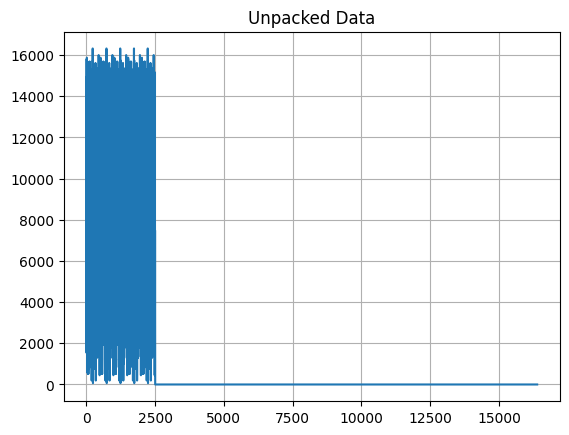

Int16
/home/digilab/SUA8000_Examples/remote_control_V3/examples/wave_file/wave.bin Waveform file saved successfully


In [ ]:
# Convert string to numeric list if needed
wave_data = [int(x) for x in wave.strip().split('\n')]
current_length = len(wave_data)
target_length = ((current_length - 1) // 16384 + 1) * 16384

if current_length < target_length:
    padding_length = target_length - current_length
    print(f"Number of zeros to pad: {padding_length}")
    
    # Use np.pad to fill with zeros
    signal_data = np.pad(wave_data, (0, padding_length), mode='constant', constant_values=0)
else:
    signal_data = wave_data

# draw
plt.plot(signal_data)
plt.title('Unpacked Data')
plt.grid(True)
plt.show()

type_map = {
    "Int16": np.int16,
    "Float": np.float32,
    "Double": np.double,
    "IQ(Int16)": np.int32,
    "IQ(Float32)": np.complex64,
    "IQ(Double)": np.complex128,
}

# save
wave_file_path = current_dir / 'wave_file'
if not os.path.exists(wave_file_path):
    os.makedirs(wave_file_path)
file_path = wave_file_path / 'wave.bin'
print(wave_type)
signal_data.astype(type_map[wave_type]).tofile(file_path)
print(f"{file_path} Waveform file saved successfully")


In [10]:
visa_resource = f'TCPIP::{device_ip}::5555::SOCKET'
        
rm = pyvisa.ResourceManager('@py')

session = rm.open_resource(visa_resource)  # open resource
session.write_termination = '\n'
session.read_termination = '\n'
session.timeout = 50000  # timeout unit: ms
scpi_query = session.query
scpi_write = session.write
scpi_read = session.read

In [11]:
model_info = {}
        
# Device name
device_name = scpi_query(':SYS:DEVice:NAMe? ').replace('\n', '').split(',')
# All module names on the device
module_names = scpi_query(':SYS:DEVice:MODUles?').replace('\n', '').split(',')
for module_name in module_names:
    module_dict = {}
    # Functions supported by this module
    funcs = scpi_query(f':SYS:DEVice:MODUles:FUNC? {module_name}').replace('\n', '').split(',')
    # Query all channels
    in_chnls = []
    out_chnls = []
    for func in funcs:
        if func == 'AWG':
            in_chnls = scpi_query(f':SYS:DEVice:MODUles:CHNLs:OUT? {module_name}').replace('\n', '').split(',')
        if func == 'Digitizer':
            out_chnls = scpi_query(f':SYS:DEVice:MODUles:CHNLs:IN? {module_name}').replace('\n', '').split(',')
    module_dict.setdefault("AWG", in_chnls)
    module_dict.setdefault("Digitizer", out_chnls)
    model_info.setdefault(module_name, module_dict)

print(f"device_name: {device_name}")
print(f"model_info: {model_info}")

device_name: ['TestDevice']
model_info: {'S0_M1210': {'AWG': [], 'Digitizer': []}, 'S0_M2301': {'AWG': [], 'Digitizer': []}, 'S2_M4901': {'AWG': ['CH1', 'CH2'], 'Digitizer': ['CH1', 'CH2']}}


In [12]:
# Module name
module_name = 'S2_M4901'
board_name = 'S0_M1210'
# Channel enable
channel_en = {"CH1": True,
              "CH2": True}

In [13]:
# Turn off DUC
scpi_query(f':AWG:SOURce:WAVE:InternalMultiple {module_name},1')

for key, value in channel_en.items():
    if value:
        scpi_query(f':AWG:OUTPut:DUC:EN {key},False')

In [14]:
# Configure sample rate
scpi_query(f':AWG:SOURce:DAC:SRATe {module_name},{sample_rate}')
bvcTools.sync(device_ip, module_name, board_name)

In [15]:
type_scpi_map = {
    "Int16": "INT16",
    "Float": "FLOAT32",
    "Double": "DOUBLE",
    "IQ(Int16)": "COMPLEX32",
    "IQ(Float32)": "COMPLEX64",
    "IQ(Double)": "COMPLEX128",
}

wave_list = "seg1"
scpi_query(f':AWG:WAVList:ADDList {module_name},{wave_list},{len(signal_data)},{type_scpi_map[wave_type]}')
# Download waveform file to wave table
data = {
    "scpi": f":AWG:WAVLIST:WAVeform:RTTRACE {module_name},{wave_list},0,{len(signal_data)},\n"
}
with open(file_path, 'rb') as f:
    files = {
        "file": f
    }
    response = requests.post(f'http://{device_ip}:8000/scpi', data=data, files=files)

In [16]:
NSWave_name = "sequence1"
# Create wave table
scpi_query(f':AWG:NSQC:ADD {NSWave_name}')

# Wait for external trigger playback
# nw.wait_for_trigger_with_source will modify logic trigger source
nswave_data = {
    "scpi": f":AWG:NSQC:UPload {NSWave_name},\n",
    "nsqc": f"""@nw.kernel
def program(wlist: dict[str, np.ndarray]):
    {wave_list}: nw.ArbWave = nw.init_arbwave(wlist, '{wave_list}')
    while True:
        nw.play_arb({wave_list})
    return nw.Kernel()"""
}
# Upload NSWave
response = requests.post(f'http://{device_ip}:8000/scpi', json=nswave_data)
# Compile
for key, value in channel_en.items():
    if value:
        scpi_query(f':AWG:NSQC:COMPile {key},{NSWave_name}')
# Deploy
scpi_query(f':AWG:WAVList:NSQC:COMPile:Send {module_name}')

''

In [17]:
# Configure enable
for key, value in channel_en.items():
    rate = scpi_query(f':AWG:OUTPut:EN {key},{value}')
scpi_query(f':SYS:Control:RUN {module_name}')
scpi_query(f':SAT:TRIGger:INTernal:Run {board_name}')

''

In [18]:
time.sleep(10)

In [19]:
scpi_query(f':SAT:TRIGger:INTernal:Stop {board_name}')
scpi_query(f':SYS:Control:STOP {module_name}')

''